In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np

This is a test markdown line

0    Polygon
dtype: object
{'init': 'epsg:32618'}
            minx          miny           maxx          maxy
0  732128.016925  4.713209e+06  732251.102892  4.713359e+06
                                            geometry  id
0  POLYGON ((732128.016925 4713359.17112, 732251....   1


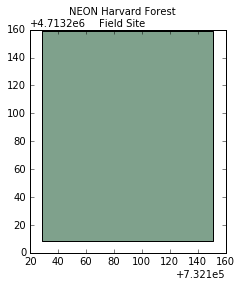

In [2]:
poly_harv = gpd.read_file('_data-jsta/HARV/HarClip_UTMZ18.shp')

print(poly_harv.geom_type)
print(poly_harv.crs)
print(poly_harv.bounds)

print(poly_harv.head())

poly_harv.plot(cmap = 'Greens')
plt.suptitle("NEON Harvard Forest\nField Site")
plt.show()


# 